# **Normality Checking and Feature Normalization on IRIS Dataset**

# Q-Q Plot - Comparing Theoretically Distributed Samples for Nomality

In statistics, a **Q–Q plot (quantile-quantile plot)** is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other.

A point (x, y) on the plot corresponds to one of the quantiles of the second distribution (y-coordinate, e.g sample data) plotted against the same quantile of the first distribution (x-coordinate, theoretical distribution). 
This defines a parametric curve where the parameter is the index of the quantile interval.

**If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on the identity line y = x.** 

**If the distributions are linearly related, the points in the Q–Q plot will approximately lie on a line, but not necessarily on the line y = x.**

In [ ]:
import numpy as np

#create dataset with 100 values that follow a normal distribution
np.random.seed(0)
data = np.random.normal(0,1, 1000)

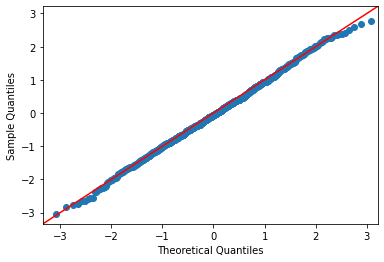

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(data, line='45')
plt.show()

# Shapiro Wilk Test

### If the P-Value of the Shapiro Wilk Test is larger than 0.05, we assume a normal distribution
### If the P-Value of the Shapiro Wilk Test is smaller than 0.05, we do not assume a normal distribution

In [62]:
from scipy.stats import norm, shapiro
my_data = norm.rvs(size=500)

# If the P-Value of the Shapiro Wilk Test is larger than 0.05, we assume a normal distribution
# It will return the test statistic called W and the P-Value.
w_statistic, p_value = shapiro(my_data) 
print(w_statistic, p_value)

if p_value > 0.05:
  print('Data is assumed to be Normaly distributed')
else:
  print('Data is Not assumed to be Normaly distributed')


0.9952835440635681 0.13359372317790985
Data is assumed to be Normaly distributed


# Kolmogorov Smirnov Test

The Test Statistic of the KS Test is the Kolmogorov Smirnov Statistic, which follows a Kolmogorov distribution if the null hypothesis is true.

If the observed data perfectly follow a normal distribution, the value of the KS statistic will be 0. 
The P-Value is used to decide whether the difference is large enough to reject the null hypothesis:

**If the P-Value of the KS Test is larger than 0.05, we assume a normal distribution.**

**If the P-Value of the KS Test is smaller than 0.05, we do not assume a normal distribution.**

In [63]:
from scipy.stats import kstest, norm
import statsmodels.api as sm

my_data = norm.rvs(size=1000)
ks_statistic, p_value = kstest(my_data, 'norm')
print(ks_statistic, p_value)

if p_value > 0.05:
  print('Data is assumed to be Normaly distributed')
else:
  print('Data is Not assumed to be Normaly distributed')


0.02001951100222102 0.8099687092970156
Data is assumed to be Normaly distributed


# Work with the IRIS Features

In [17]:
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.simplefilter("ignore")

In [151]:
df_iris = pd.read_csv("IRIS.csv")

In [152]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
'''
df = df_iris[df_iris['species']=='Setosa']
df
'''

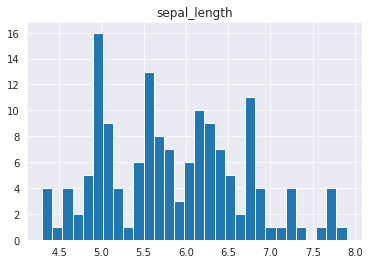

<Axes: ylabel='Density'>

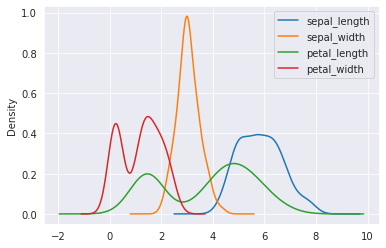

In [18]:
feature_name = 'sepal_length'
#feature_name = 'petal_width'
#feature_name = 'petal_length'
#feature_name = 'sepal_width'

data = df_iris[feature_name]
plt.hist(data, bins=30)
plt.title(feature_name)
plt.show()

df_iris.plot(kind='density')

In [135]:
# Importing library
from scipy.stats import skew, kurtosis

#feature_name = 'sepal_length'
feature_name = 'sepal_width'

#feature_name = 'petal_length'
#feature_name = 'petal_width'

data = df_iris[feature_name] 

# Calculate the skewness
print("Skew : ", skew(data, axis=0, bias=True))

# Calculate the kurtosis
print("Kurtosis : ", kurtosis(data, axis=0, bias=True))


Skew :  0.31576710633893473
Kurtosis :  0.18097631752246768


In [ ]:
'''
sns.kdeplot(data=df_iris, x=feature_name)  # same as >>  df_iris[feature_name].plot(kind='density')
sns.rugplot(data=df_iris, x=feature_name)
'''

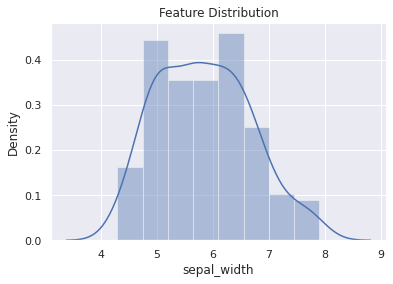

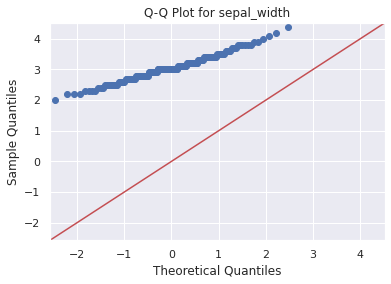

In [91]:
#feature_name = 'sepal_length'
feature_name = 'sepal_width'
#feature_name = 'petal_width'
#feature_name = 'petal_length'

my_data = df_iris[feature_name]

#----------------------------------------------
# Distribution Plot with Seaborn

# plot distplot
fig, ax = plt.subplots()
ax = sns.distplot(data)   # alternatively we may also write sns.distplot(data, ax = ax)
 
# This will change the limits of the x-axis
#ax.set_xlim(1, 10)
#ax.set_ylim(0, 1)
 
# This will add label to the X-axis
#ax.set_xlabel( "Feature Values")
ax.set_xlabel( feature_name)
 
# This will add label to the Y-axis
ax.set_ylabel( "Density")
 
# This will add title to the plot
ax.set_title( "Feature Distribution") 
plt.show()

#----------------------------------------------


# Create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(my_data, line='45')

plt.title('Q-Q Plot for ' + feature_name)
plt.show()


In [94]:
from scipy.stats import kstest, shapiro, norm

# Shapiro–Wilk Test
w_statistic, p_value = shapiro(my_data) 

print('Shapiro–Wilk Test:')
print(w_statistic, p_value)
if p_value > 0.05:
  print('Data is assumed to be Normaly distributed')
else:
  print('Data is Not assumed to be Normaly distributed')

#-------------------------------------------------------------
print("\n")

# Kolmogorov–Smirnov Test
ks_statistic, p_value = kstest(my_data, 'norm')

print("Kolmogorov–Smirnov Test:")
print(ks_statistic, p_value)
if p_value > 0.05:
  print('Data is assumed to be Normaly distributed')
else:
  print('Data is Not assumed to be Normaly distributed')


Shapiro–Wilk Test:
0.9849168062210083 0.10112646222114563
Data is assumed to be Normaly distributed


Kolmogorov–Smirnov Test:
0.9794298858198347 1.9343513094431768e-253
Data is Not assumed to be Normaly distributed


# Feature Scaling

In [119]:
# Scaling the features in the range 0 to 1.

X1 = df_iris['sepal_length']
X1_min = np.min(X1)
X1_max = np.max(X1)
X1 = (X1-X1_min)/(X1_max - X1_min)

X2 = df_iris['sepal_width']
X2_min = np.min(X2)
X2_max = np.max(X2)
X2 = (X2-X2_min)/(X2_max - X2_min)

X3 = df_iris['petal_length']
X3_min = np.min(X3)
X3_max = np.max(X3)
X3 = (X3-X3_min)/(X3_max - X3_min)

X4 = df_iris['petal_width']
X4_min = np.min(X4)
X4_max = np.max(X4)
X4 = (X4-X4_min)/(X4_max - X4_min)

In [120]:
X_scaled_df = pd.concat([X1, X2, X3, X4], axis=1)
X_scaled_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [117]:
y_species = df_iris['species']

df = pd.concat([X_scaled_df, y_species], axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,Setosa
1,0.166667,0.416667,0.067797,0.041667,Setosa
2,0.111111,0.500000,0.050847,0.041667,Setosa
3,0.083333,0.458333,0.084746,0.041667,Setosa
4,0.194444,0.666667,0.067797,0.041667,Setosa


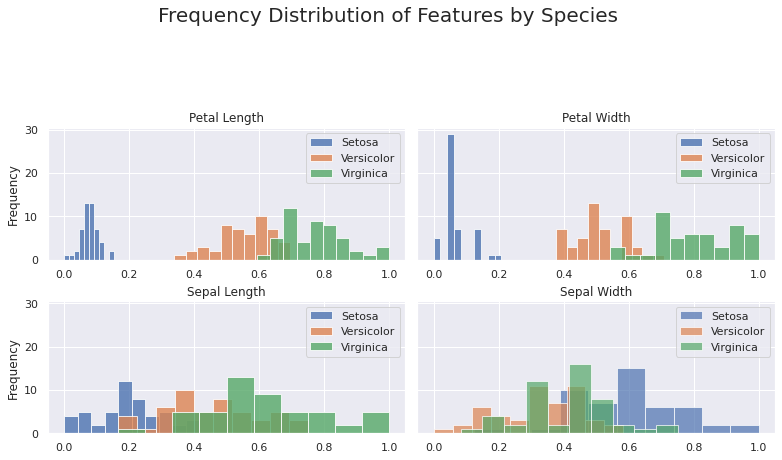

In [127]:
import matplotlib.pyplot as plt

# Notice x-axis on subplots are all the same for all features (0 to 1) after scaling.
fig = plt.figure(figsize=(12,7))
fig.suptitle('Frequency Distribution of Features by Species ',fontsize=20)

ax1 = fig.add_subplot(221)
df.groupby("species").petal_length.plot(kind='hist',alpha=0.8,legend=True,title='Petal Length')

ax2 = fig.add_subplot(222,sharey=ax1)
df.groupby("species").petal_width.plot(kind='hist',alpha=0.8,legend=True,title='Petal Width')

ax3 = fig.add_subplot(223,sharey=ax1)
df.groupby("species").sepal_length.plot(kind='hist',alpha=0.8,legend=True,title='Sepal Length')

ax4 = fig.add_subplot(224,sharey=ax1)
df.groupby("species").sepal_width.plot(kind='hist',alpha=0.7,legend=True,title='Sepal Width')

plt.tight_layout(pad=4, w_pad=1, h_pad= .5)
plt.show()